In [1]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
import datetime

In [3]:
data = pd.read_csv('News.csv')

In [4]:
data.head()

,Unnamed: 0,title,text,subject,date,Labels
0,0,GRAPHIC RIOT VIDEOS EXPOSE THUGS ATTACKING ELD...,youngers these days are becoming so moist pic....,politics,"Sep 22, 2016",Fake
1,1,BIG BROTHER: FEDS WANT YOUR DOCTOR TO WARN YOU...,totally out of bounds! This is so wrong and so...,Government News,"Jun 26, 2015",Fake
2,2,BLACK LIVES MATTER TERRORISTS May Be Shut Down...,ter ror ist ter r st/ noun a person who uses ...,politics,"Dec 23, 2015",Fake
3,3,EMBARRASSING: Obama Explains How He Will ‘Rebu...,re buke r byo ok/ verb 1. express sharp disapp...,left-news,"Nov 25, 2015",Fake
4,4,OHIO ELECTOR TORCHES Anti-Trump Letters He Rec...,pic.twitter.com/KMnLrwB6t1 Richard K. Jones (...,politics,"Dec 21, 2016",Fake


In [5]:
data.drop('Unnamed: 0' , axis = 1 , inplace = True)

In [6]:
data.drop('subject' , axis = 1 , inplace = True)

In [7]:
data

,title,text,date,Labels
0,GRAPHIC RIOT VIDEOS EXPOSE THUGS ATTACKING ELD...,youngers these days are becoming so moist pic....,"Sep 22, 2016",Fake
1,BIG BROTHER: FEDS WANT YOUR DOCTOR TO WARN YOU...,totally out of bounds! This is so wrong and so...,"Jun 26, 2015",Fake
2,BLACK LIVES MATTER TERRORISTS May Be Shut Down...,ter ror ist ter r st/ noun a person who uses ...,"Dec 23, 2015",Fake
3,EMBARRASSING: Obama Explains How He Will ‘Rebu...,re buke r byo ok/ verb 1. express sharp disapp...,"Nov 25, 2015",Fake
4,OHIO ELECTOR TORCHES Anti-Trump Letters He Rec...,pic.twitter.com/KMnLrwB6t1 Richard K. Jones (...,"Dec 21, 2016",Fake
...,...,...,...,...
44893,EPIC! CNN ANCHOR DON LEMON Cuts Interview Afte...,,"Feb 18, 2017",Fake
44894,LIVE FEED OF TRUMP RALLY: CHECK OUT THE LINE T...,,"Feb 18, 2017",Fake
44895,PEGGY HUBBARD BLASTS Priorities Of Al Sharpton...,,"Feb 18, 2017",Fake
44896,WHOA! RUSH LIMBAUGH RIPS Into Republicans Who ...,,"Oct 12, 2016",Fake


In [8]:
#data['subject'].value_counts()

In [9]:
#data['subject'].value_counts().plot.bar()
#plt.show()

In [10]:
#We see that the highest number of the news are from the subject of PoliticsNews followed by the WorldNews and the lowest being from the subject of Middle-East
#Around 11.2k records are from the the policticsnews while only 0.8k records are from the subject "Middle - east"

In [11]:
data['Labels'].value_counts()

Fake    23481
True    21417
Name: Labels, dtype: int64

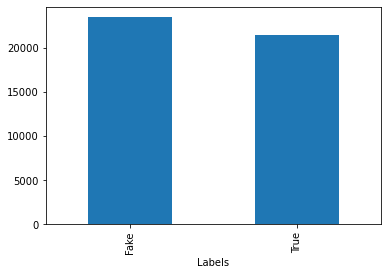

In [12]:
data.groupby('Labels')['title'].count().plot.bar()
plt.show()

The dataset is not an unbalanced dataset since the number of fake news is approximately equal to the number of true news

In [13]:
#(data.loc[(data['Labels'] == 'Fake')])['subject'].value_counts().plot.bar()
#plt.show()

In [14]:
#(data.loc[(data['Labels'] == 'True')])['subject'].value_counts().plot.bar()
#plt.show()

For the news records with labels as "Fake" , we see that the records are from all the subjects as in the total records , While for news records as "True" the labels are only the politics and the worldnews

In [15]:
#taking month from the column date
data['month'] = data['date'].str[:3]

In [16]:
#extracting year from the column year
data['year'] = data['date'].str[-5:]

In [17]:
data['month'].value_counts()

Nov    5536
Oct    5476
Sep    5199
Dec    4614
Mar    3336
Jan    3106
May    3076
Apr    3034
Feb    2922
Jun    2896
Jul    2829
Aug    2829
15-       9
htt       9
16-       8
18-       7
17-       7
19-       3
MSN       1
14-       1
Name: month, dtype: int64

We see that there are a lot of values here which aren't in the desired format. This maybe due to the discrepancy in the format in which the date in entered

Lets see as to how such values are getting shown here

In [18]:
data.loc[data['month'] == ('15-')]

,title,text,date,Labels,month,year
379,The DIRTY TRUTH About DACA Recipients…Where Th...,"Yesterday, a second U.S. judge on Tuesday bloc...",15-Feb-18,Fake,15-,eb-18
1729,"WHAT’S WRONG WITH PELOSI? Nancy Stutters, Stam...",What s wrong with Pelosi? Nancy Pelosi is supp...,15-Feb-18,Fake,15-,eb-18
2372,“PROUD TRANSGENDER” Democrat Candidate For Con...,"WQOW -A Lacrosse, WI transgender person, who r...",15-Feb-18,Fake,15-,eb-18
2451,SC STATE REP Who is a Former Cop Proposes Smar...,WHO BETTER THAN A FORMER POLICE OFFICER TO UND...,15-Feb-18,Fake,15-,eb-18
12267,MEDIA PROMOTES Fake News That Shooter Connecte...,The mainstream media is guilty of fake news wh...,15-Feb-18,Fake,15-,eb-18
12448,POLITICS FIRST: LEFTIST PARENTS Of Former Comb...,The heartbreaking story of two parents who put...,15-Feb-18,Fake,15-,eb-18
17016,HUH? RAPPER JAY-Z Compares Trayvon Martin to M...,Rapper Jay-Z attended the Peace Walk & Peace T...,15-Feb-18,Fake,15-,eb-18
28428,JUST IN: Senate Rejects Immigration Bill…Trump...,How could the Senate be so lame in their effor...,15-Feb-18,Fake,15-,eb-18
40050,TWO HIGH SCHOOL JROTC Members Tell INCREDIBLE ...,ABC News When two Marjory Stoneman Douglas Hi...,15-Feb-18,Fake,15-,eb-18


In [19]:
data['date_length'] = data['date'].str.len()

In [20]:
data.head()

,title,text,date,Labels,month,year,date_length
0,GRAPHIC RIOT VIDEOS EXPOSE THUGS ATTACKING ELD...,youngers these days are becoming so moist pic....,"Sep 22, 2016",Fake,Sep,2016,12
1,BIG BROTHER: FEDS WANT YOUR DOCTOR TO WARN YOU...,totally out of bounds! This is so wrong and so...,"Jun 26, 2015",Fake,Jun,2015,12
2,BLACK LIVES MATTER TERRORISTS May Be Shut Down...,ter ror ist ter r st/ noun a person who uses ...,"Dec 23, 2015",Fake,Dec,2015,12
3,EMBARRASSING: Obama Explains How He Will ‘Rebu...,re buke r byo ok/ verb 1. express sharp disapp...,"Nov 25, 2015",Fake,Nov,2015,12
4,OHIO ELECTOR TORCHES Anti-Trump Letters He Rec...,pic.twitter.com/KMnLrwB6t1 Richard K. Jones (...,"Dec 21, 2016",Fake,Dec,2016,12


In [21]:
data['date_length'].value_counts()

12     10465
17      8099
18      6334
11      4022
16      3927
14      3742
13      3026
15      2730
19      2508
9         35
74         3
66         3
88         1
145        1
149        1
120        1
Name: date_length, dtype: int64

In [22]:
data.head()

,title,text,date,Labels,month,year,date_length
0,GRAPHIC RIOT VIDEOS EXPOSE THUGS ATTACKING ELD...,youngers these days are becoming so moist pic....,"Sep 22, 2016",Fake,Sep,2016,12
1,BIG BROTHER: FEDS WANT YOUR DOCTOR TO WARN YOU...,totally out of bounds! This is so wrong and so...,"Jun 26, 2015",Fake,Jun,2015,12
2,BLACK LIVES MATTER TERRORISTS May Be Shut Down...,ter ror ist ter r st/ noun a person who uses ...,"Dec 23, 2015",Fake,Dec,2015,12
3,EMBARRASSING: Obama Explains How He Will ‘Rebu...,re buke r byo ok/ verb 1. express sharp disapp...,"Nov 25, 2015",Fake,Nov,2015,12
4,OHIO ELECTOR TORCHES Anti-Trump Letters He Rec...,pic.twitter.com/KMnLrwB6t1 Richard K. Jones (...,"Dec 21, 2016",Fake,Dec,2016,12


In [23]:
data[data['date_length'] >= 36]

,title,text,date,Labels,month,year,date_length
94,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Fake,htt,t.jpg,74
95,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Fake,htt,t.jpg,74
96,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Fake,htt,t.jpg,74
97,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Fake,htt,d.jpg,66
98,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Fake,htt,d.jpg,66
99,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Fake,htt,d.jpg,66
100,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,Fake,htt,-pie/,88
101,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,Fake,htt,dier/,145
102,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,Fake,htt,left/,149
105,Homepage,[vc_row][vc_column width= 1/1 ][td_block_trend...,MSNBC HOST Rudely Assumes Steel Worker Would N...,Fake,MSN,ideo],120


For these records , we can see that the date column contains a corrupted value. Hence we are removing these records from our record

In [24]:
#since the date_length is more than 36 , we can see above that those values are not correct and contain some vague data. We can safely remove such records
data.drop(data[data['date_length'] >= 36].index , inplace = True)

In [25]:
data.loc[data['date_length'] == 9]

,title,text,date,Labels,month,year,date_length
379,The DIRTY TRUTH About DACA Recipients…Where Th...,"Yesterday, a second U.S. judge on Tuesday bloc...",15-Feb-18,Fake,15-,eb-18,9
1143,BREAKING: FL GOV RICK SCOTT Calls for FBI Dire...,"While the left points the finger at guns, guns...",16-Feb-18,Fake,16-,eb-18,9
1501,WATCH SHERIFF’S Honest Response After a School...,"When it gets down to it, what this sheriff sai...",16-Feb-18,Fake,16-,eb-18,9
1729,"WHAT’S WRONG WITH PELOSI? Nancy Stutters, Stam...",What s wrong with Pelosi? Nancy Pelosi is supp...,15-Feb-18,Fake,15-,eb-18,9
1979,JUST IN: CROOKED DOJ OFFICIAL Didn’t Reveal Th...,We ve been covering the curious case of DOJ of...,14-Feb-18,Fake,14-,eb-18,9
2001,BUSTED! Maxine Waters’ Ties to Black Nationali...,We reported that Maxine Waters and members of ...,18-Feb-18,Fake,18-,eb-18,9
2372,“PROUD TRANSGENDER” Democrat Candidate For Con...,"WQOW -A Lacrosse, WI transgender person, who r...",15-Feb-18,Fake,15-,eb-18,9
2451,SC STATE REP Who is a Former Cop Proposes Smar...,WHO BETTER THAN A FORMER POLICE OFFICER TO UND...,15-Feb-18,Fake,15-,eb-18,9
9928,“THE TRUMP CURSE IS REAL”…Social Media Respond...,Two months before the Winter Olympics in Seoul...,17-Feb-18,Fake,17-,eb-18,9
10193,TUCKER CARLSON Rips The Left On Gun Control Hy...,Tucker Carlson weighed in on the hysteria over...,16-Feb-18,Fake,16-,eb-18,9


All the values in the date column here are Feb 2018 , hence we can change the month and year to Feb and 2018 explicitly for this case

In [26]:
data.loc[data['date_length'] == 9 , 'month'] = 'Feb'

In [27]:
data.loc[data['date_length'] == 9 , 'year'] = '2018'

In [28]:
data['year'].value_counts()

2017     16701
 2016    11754
 2017     9203
2016      4716
 2015     2479
2018        35
Name: year, dtype: int64

In [29]:
data['year'] = data['year'].str.strip(' ')

In [30]:
data.head()

,title,text,date,Labels,month,year,date_length
0,GRAPHIC RIOT VIDEOS EXPOSE THUGS ATTACKING ELD...,youngers these days are becoming so moist pic....,"Sep 22, 2016",Fake,Sep,2016,12
1,BIG BROTHER: FEDS WANT YOUR DOCTOR TO WARN YOU...,totally out of bounds! This is so wrong and so...,"Jun 26, 2015",Fake,Jun,2015,12
2,BLACK LIVES MATTER TERRORISTS May Be Shut Down...,ter ror ist ter r st/ noun a person who uses ...,"Dec 23, 2015",Fake,Dec,2015,12
3,EMBARRASSING: Obama Explains How He Will ‘Rebu...,re buke r byo ok/ verb 1. express sharp disapp...,"Nov 25, 2015",Fake,Nov,2015,12
4,OHIO ELECTOR TORCHES Anti-Trump Letters He Rec...,pic.twitter.com/KMnLrwB6t1 Richard K. Jones (...,"Dec 21, 2016",Fake,Dec,2016,12


In [31]:
#removing the date and the date_length column
data.drop(['date','date_length'] , axis = 1 , inplace = True)

In [32]:
data.head()

,title,text,Labels,month,year
0,GRAPHIC RIOT VIDEOS EXPOSE THUGS ATTACKING ELD...,youngers these days are becoming so moist pic....,Fake,Sep,2016
1,BIG BROTHER: FEDS WANT YOUR DOCTOR TO WARN YOU...,totally out of bounds! This is so wrong and so...,Fake,Jun,2015
2,BLACK LIVES MATTER TERRORISTS May Be Shut Down...,ter ror ist ter r st/ noun a person who uses ...,Fake,Dec,2015
3,EMBARRASSING: Obama Explains How He Will ‘Rebu...,re buke r byo ok/ verb 1. express sharp disapp...,Fake,Nov,2015
4,OHIO ELECTOR TORCHES Anti-Trump Letters He Rec...,pic.twitter.com/KMnLrwB6t1 Richard K. Jones (...,Fake,Dec,2016


In [33]:
df = data.copy()

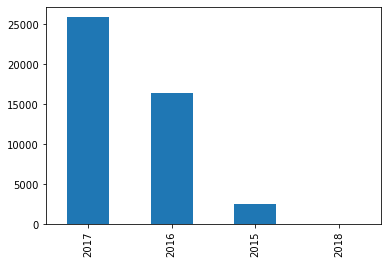

In [34]:
df['year'].value_counts().plot.bar()
plt.show()

The news data is mainly from the years 2016 and 2017 with some data from 2015 and almost neglegible data from year 2018

In [35]:
true = df.loc[df['Labels']=='True']['month'].value_counts()
fake     = df.loc[df['Labels']=='Fake']['month'].value_counts()
df_plot  = pd.DataFrame([true,fake])
df_plot.index=['true','fake']

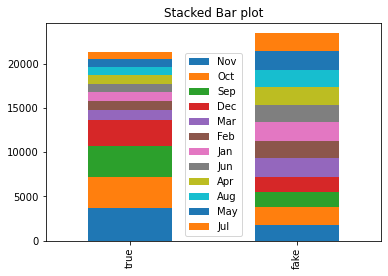

In [36]:
df_plot.plot(kind='bar',stacked=True, title='Stacked Bar plot');

We can see here that the data is uniformly distributed across the year for the news with labels = "Fake" , while for news with Labels as "False" the data is skewed towards the months of September to December

In [37]:
true = df.loc[df['Labels']=='True']['year'].value_counts()
fake     = df.loc[df['Labels']=='Fake']['year'].value_counts()
df_plot  = pd.DataFrame([true,fake])
df_plot.index=['true','fake']

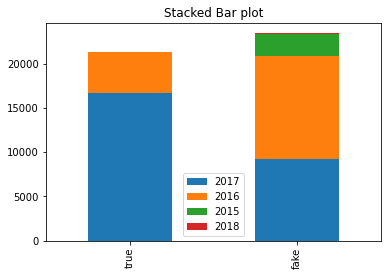

In [38]:
df_plot.plot(kind='bar',stacked=True, title='Stacked Bar plot');

We also observe that for news with labels as "True" , we see no news from the year 2015 which means that all the news from the year 2015 was "Fake". This can be a good insight to use

In [39]:
df['title_len'] = df['title'].str.len()
df['text_len'] = df['text'].str.len()

In [40]:
df['title_n_words'] = df['title'].apply(lambda row : len(row.split(" ")))
df['text_n_words'] = df['text'].apply(lambda row : len(row.split(" ")))

In [41]:
df.head()

,title,text,Labels,month,year,title_len,text_len,title_n_words,text_n_words
0,GRAPHIC RIOT VIDEOS EXPOSE THUGS ATTACKING ELD...,youngers these days are becoming so moist pic....,Fake,Sep,2016,130,1150,20,145
1,BIG BROTHER: FEDS WANT YOUR DOCTOR TO WARN YOU...,totally out of bounds! This is so wrong and so...,Fake,Jun,2015,67,1207,12,200
2,BLACK LIVES MATTER TERRORISTS May Be Shut Down...,ter ror ist ter r st/ noun a person who uses ...,Fake,Dec,2015,87,1817,14,289
3,EMBARRASSING: Obama Explains How He Will ‘Rebu...,re buke r byo ok/ verb 1. express sharp disapp...,Fake,Nov,2015,97,1615,14,288
4,OHIO ELECTOR TORCHES Anti-Trump Letters He Rec...,pic.twitter.com/KMnLrwB6t1 Richard K. Jones (...,Fake,Dec,2016,81,79,11,9


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44888 entries, 0 to 44897
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          44888 non-null  object
 1   text           44888 non-null  object
 2   Labels         44888 non-null  object
 3   month          44888 non-null  object
 4   year           44888 non-null  object
 5   title_len      44888 non-null  int64 
 6   text_len       44888 non-null  int64 
 7   title_n_words  44888 non-null  int64 
 8   text_n_words   44888 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 3.4+ MB


In [43]:
df['year'] = df['year'].astype(str).astype(int)

In [44]:
index_fake = np.where(df['Labels']=='Fake')
data_fake = df.iloc[index_fake]
index_true = np.where(df['Labels']=='True')
data_true = df.iloc[index_true]

C:\Users\akshit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\akshit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


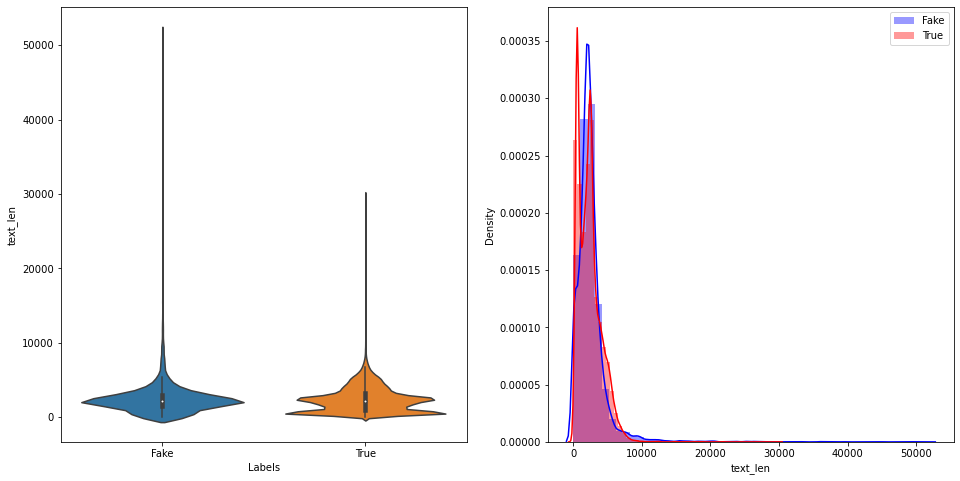

In [45]:
plt.figure(figsize = (16 , 8))
plt.subplot(1,2,1)
sns.violinplot(x = 'Labels' , y = 'text_len' , data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['Labels']=='Fake']['text_len'][0:] , label = 'Fake' , color = 'blue')
sns.distplot(df[df['Labels']=='True']['text_len'][0:] , label = 'True' , color = 'red')
plt.legend()
plt.show()

C:\Users\akshit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\akshit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


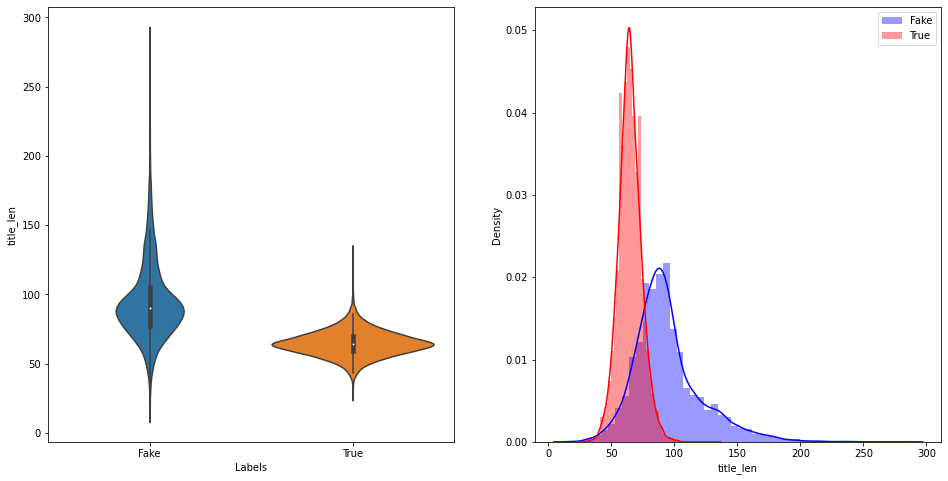

In [46]:
plt.figure(figsize = (16 , 8))
plt.subplot(1,2,1)
sns.violinplot(x = 'Labels' , y = 'title_len' , data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['Labels']=='Fake']['title_len'][0:] , label = 'Fake' , color = 'blue')
sns.distplot(df[df['Labels']=='True']['title_len'][0:] , label = 'True' , color = 'red')
plt.legend()
plt.show()

We have plotted a violin plot and a distribution plot for the title len vs the label . 
We see that using the length of the news title , we are able to derive some insights as to know whether the news is fake or true since the graph shows some distinction since for the news labels as fake the violin plot has its mean above the violin plot for the news with labels as True

From the distribution plot also , we can see that the probability density function for the two types of labels does not overlap and has high probability for news title with less title_length 

C:\Users\akshit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\akshit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


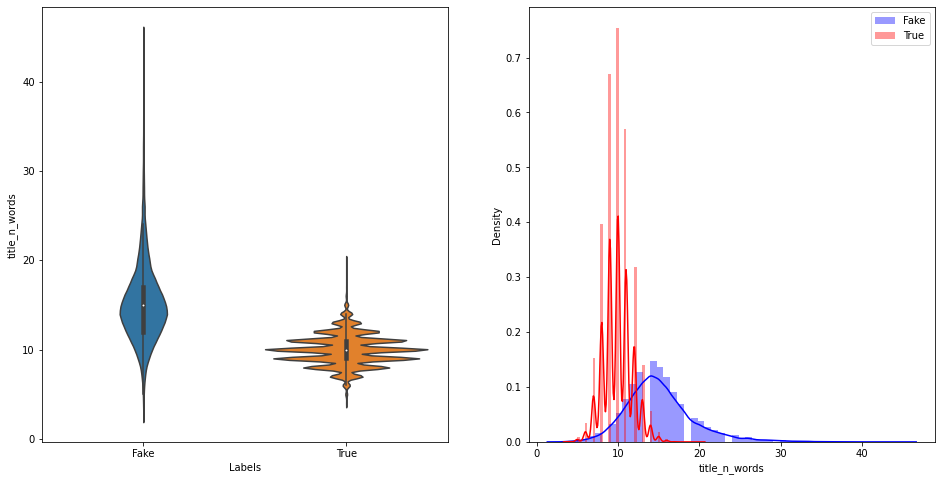

In [47]:
plt.figure(figsize = (16 , 8))
plt.subplot(1,2,1)
sns.violinplot(x = 'Labels' , y = 'title_n_words' , data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['Labels']=='Fake']['title_n_words'][0:] , label = 'Fake' , color = 'blue')
sns.distplot(df[df['Labels']=='True']['title_n_words'][0:] , label = 'True' , color = 'red')
plt.legend()
plt.show()

C:\Users\akshit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\akshit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


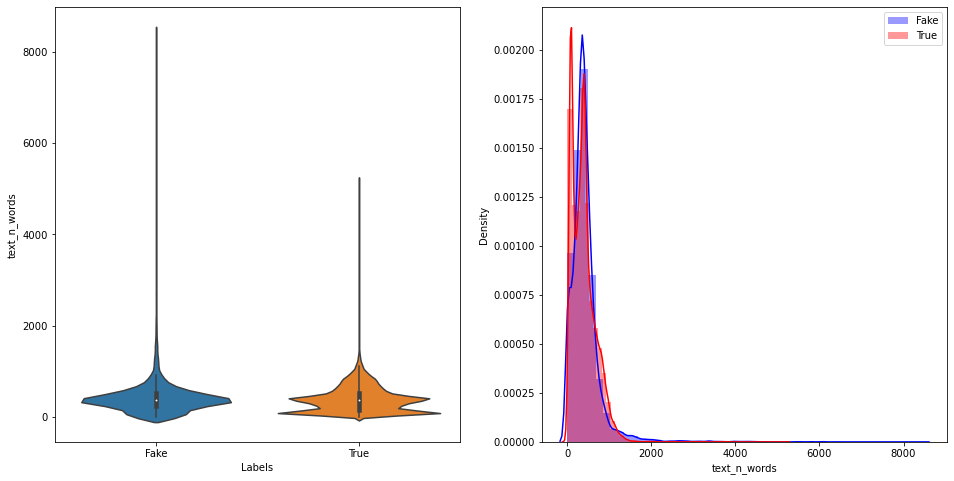

In [48]:
plt.figure(figsize = (16 , 8))
plt.subplot(1,2,1)
sns.violinplot(x = 'Labels' , y = 'text_n_words' , data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['Labels']=='Fake']['text_n_words'][0:] , label = 'Fake' , color = 'blue')
sns.distplot(df[df['Labels']=='True']['text_n_words'][0:] , label = 'True' , color = 'red')
plt.legend()
plt.show()

Like the title length , we also did a similar analysis for the number of words in the news title and the news text

We see that using the number of words in the news title , we are able to derive some insights as to know whether the news is fake or true since the graph shows some distinction

For number of words in the news text , we do not see any clear distinction and the plots mostly overlap

In [49]:
# Chi Square test of Contingency 

In [50]:
#contingency = pd.crosstab(df['subject'] , df['Labels'])

In [51]:
#contingency

In [52]:
#contingency_pct = pd.crosstab(df['subject'], df['Labels'] , normalize = 'index')

In [53]:
#contingency_pct

In [54]:
#plotting a heatmap
#plt.figure(figsize = (12,8))
#sns.heatmap(contingency , annot = True , cmap = 'YlGnBu')
#plt.show()

In [55]:
#Using the Chi2_contingency function from the scipy package , which returns the following metrics :

#chi2 : The test statistic

#p: the p value of the test

#dof = degrees of freedom 

#expected : the expected frequencies , based on the marginal sums of the table

In [56]:
#from scipy.stats import chi2_contingency

In [57]:
#chi square test
#c , p , dof , expected = chi2_contingency(contingency)

In [58]:
#print(p)

In [59]:
#The p - value is 0 which means we reject the null hypothesis . The null hypothesis here was that Labels and the subject are independent , which isn't the case as seen above

#Hence , it can be said that the subject column and the labels are not independent

# Plotting WordClouds

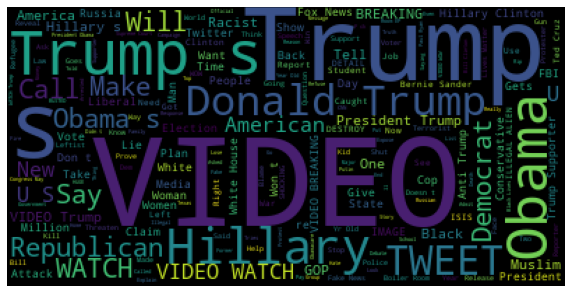

In [60]:
from wordcloud import WordCloud
all_words = ' '.join([text for text in data_fake.title])

wordcloud = WordCloud().generate(all_words)

plt.figure(figsize = (10,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

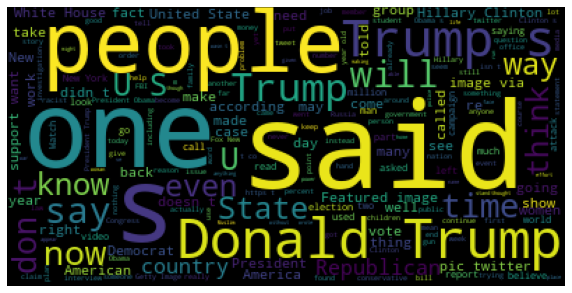

In [61]:
from wordcloud import WordCloud
all_words = ' '.join([text for text in data_fake.text])

wordcloud = WordCloud().generate(all_words)

plt.figure(figsize = (10,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

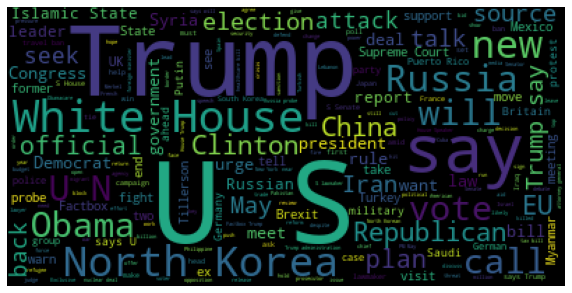

In [62]:
from wordcloud import WordCloud
all_words = ' '.join([text for text in data_true.title])

wordcloud = WordCloud().generate(all_words)

plt.figure(figsize = (10,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

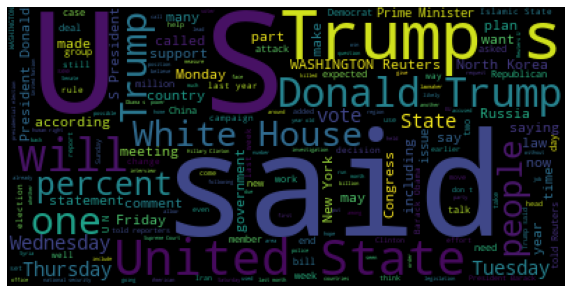

In [63]:
from wordcloud import WordCloud
all_words = ' '.join([text for text in data_true.text])

wordcloud = WordCloud().generate(all_words)

plt.figure(figsize = (10,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

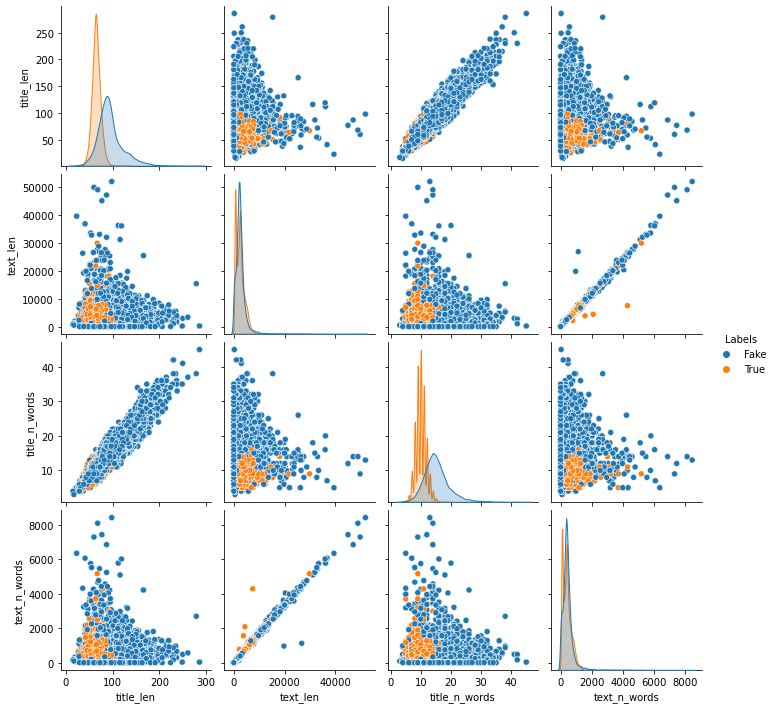

In [64]:
n = df.shape[0]
sns.pairplot(df[['title_len' , 'text_len' , 'title_n_words' , 'text_n_words', 'Labels']][0:n],
             hue = 'Labels' ,
             vars = ['title_len' , 'text_len' , 'title_n_words' , 'text_n_words'])

From almost all the plots except the probability density function for text_n_words and the text_len ,  we can see that there is some distinction between two labels

This can help us in the classification of the news records as true or fake

In [65]:
from sklearn.preprocessing import MinMaxScaler
df_subsampled = df.sample(n = 5000)
X = MinMaxScaler().fit_transform(df_subsampled[['title_len' , 'text_len' , 'title_n_words' , 'text_n_words']])
y = df_subsampled['Labels']

In [66]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2 , perplexity = 30 , verbose = 1).fit_transform(X)

C:\Users\akshit\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\akshit\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.004s...
[t-SNE] Computed neighbors for 5000 samples in 0.127s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.010740
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.985413
[t-SNE] KL divergence after 1000 iterations: 0.688005


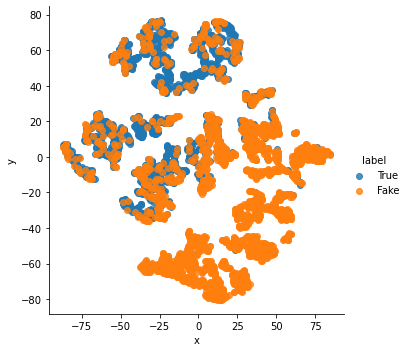

In [67]:
df_tsne = pd.DataFrame({'x' : tsne[:,0] , 'y' : tsne[:,1] , 'label' : y})
sns.lmplot(data = df_tsne , x = 'x' , y = 'y' , hue = 'label' , fit_reg = False)
plt.show()

Some separation is visible for both the classes using the TSNE with perplexity = 30.

Let us try with a different perplexity value also

In [68]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2 , perplexity = 50 , verbose = 1).fit_transform(X)

C:\Users\akshit\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\akshit\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.004s...
[t-SNE] Computed neighbors for 5000 samples in 0.209s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.013771
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.036873
[t-SNE] KL divergence after 1000 iterations: 0.665613


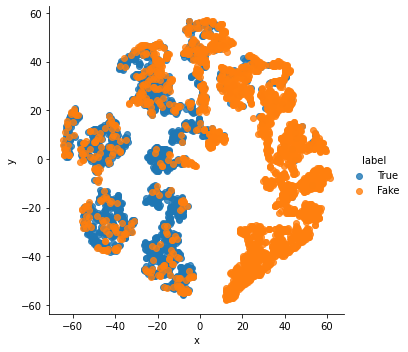

In [69]:
df_tsne = pd.DataFrame({'x' : tsne[:,0] , 'y' : tsne[:,1] , 'label' : y})
sns.lmplot(data = df_tsne , x = 'x' , y = 'y' , hue = 'label' , fit_reg = False)
plt.show()

We can see here that there is some distinction between the records with labels as "False" and the labels with records as "True"

This is a good point to begin with the further analysis

# Text Preprocessing

In [70]:
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
from PIL import Image
import plotly.graph_objs as go
import re

In [71]:
def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    
    pattern = re.compile('\W')
    lemmatizer = WordNetLemmatizer()
    
    if type(x) == type(''):
        x = re.sub(pattern , ' ' , x)
        x = re.sub('https?:\/\/.*?[\s+]' , ' ' , x)
        
        x = lemmatizer.lemmatize(x)
        example = BeautifulSoup(x)
        x = example.get_text()
    
    return x

In [72]:
df['title'] = df['title'].apply(preprocess)
df['text'] = df['text'].apply(preprocess)

# Removing Stopwords

In [73]:
#Removing stop words
stopwords = stopwords.words('english')

In [74]:
df['title'] = df['title'].apply(lambda x : ' '.join([word for word in x.split() if word not in stopwords]))

In [75]:
df['text'] = df['text'].apply(lambda x : ' '.join([word for word in x.split() if word not in stopwords]))

In [76]:
X = df.drop(['Labels'] , axis = 1)
y = df['Labels']

In [77]:
df

,title,text,Labels,month,year,title_len,text_len,title_n_words,text_n_words
0,graphic riot videos expose thugs attacking eld...,youngers days becoming moist pic twitter com c...,Fake,Sep,2016,130,1150,20,145
1,big brother feds want doctor warn global warming,totally bounds wrong crazy anyone half brain k...,Fake,Jun,2015,67,1207,12,200
2,black lives matter terrorists may shut mall am...,ter ror ist ter r st noun person uses terroris...,Fake,Dec,2015,87,1817,14,289
3,embarrassing obama explains rebuke isis attend...,buke r byo ok verb 1 express sharp disapproval...,Fake,Nov,2015,97,1615,14,288
4,ohio elector torches anti trump letters receiv...,pic twitter com kmnlrwb6t1 richard k jones but...,Fake,Dec,2016,81,79,11,9
...,...,...,...,...,...,...,...,...,...
44893,epic cnn anchor lemon cuts interview guest say...,,Fake,Feb,2017,95,1,17,2
44894,live feed trump rally check line get president...,,Fake,Feb,2017,97,1,17,2
44895,peggy hubbard blasts priorities al sharpton bl...,,Fake,Feb,2017,191,1,31,2
44896,whoa rush limbaugh rips republicans support tr...,,Fake,Oct,2016,73,1,11,2


In [78]:
df['title_and_text'] = df['title']+ " "+df['text']

In [79]:
df

,title,text,Labels,month,year,title_len,text_len,title_n_words,text_n_words,title_and_text
0,graphic riot videos expose thugs attacking eld...,youngers days becoming moist pic twitter com c...,Fake,Sep,2016,130,1150,20,145,graphic riot videos expose thugs attacking eld...
1,big brother feds want doctor warn global warming,totally bounds wrong crazy anyone half brain k...,Fake,Jun,2015,67,1207,12,200,big brother feds want doctor warn global warmi...
2,black lives matter terrorists may shut mall am...,ter ror ist ter r st noun person uses terroris...,Fake,Dec,2015,87,1817,14,289,black lives matter terrorists may shut mall am...
3,embarrassing obama explains rebuke isis attend...,buke r byo ok verb 1 express sharp disapproval...,Fake,Nov,2015,97,1615,14,288,embarrassing obama explains rebuke isis attend...
4,ohio elector torches anti trump letters receiv...,pic twitter com kmnlrwb6t1 richard k jones but...,Fake,Dec,2016,81,79,11,9,ohio elector torches anti trump letters receiv...
...,...,...,...,...,...,...,...,...,...,...
44893,epic cnn anchor lemon cuts interview guest say...,,Fake,Feb,2017,95,1,17,2,epic cnn anchor lemon cuts interview guest say...
44894,live feed trump rally check line get president...,,Fake,Feb,2017,97,1,17,2,live feed trump rally check line get president...
44895,peggy hubbard blasts priorities al sharpton bl...,,Fake,Feb,2017,191,1,31,2,peggy hubbard blasts priorities al sharpton bl...
44896,whoa rush limbaugh rips republicans support tr...,,Fake,Oct,2016,73,1,11,2,whoa rush limbaugh rips republicans support tr...


In [80]:
X = df.drop('Labels' , axis = 1)
y = df['Labels']

# Splitting the dataset

In [81]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , stratify = y , test_size = 0.20)

In [82]:
print(X_train.shape)
print(y_train.shape)

(35910, 9)
(35910,)


In [84]:
print(X_test.shape)
print(y_test.shape)

(8978, 9)
(8978,)


# Vectorizing the Data

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [86]:
from sklearn.preprocessing import OneHotEncoder

encoding Month

In [87]:
vectorizer_month = OneHotEncoder()
vectorizer_month.fit(X_train['month'].values.reshape(-1,1))
X_train_month = vectorizer_month.transform(X_train['month'].values.reshape(-1,1))
X_test_month = vectorizer_month.transform(X_test['month'].values.reshape(-1,1))

encoding the titles

In [88]:
vectorizer_title = TfidfVectorizer(min_df = 10 , ngram_range = (1,3) , max_features = 5000)
vectorizer_title.fit(X_train['title'].values)
X_train_title = vectorizer_title.transform(X_train['title'].values)
X_test_title = vectorizer_title.transform(X_test['title'].values)

encoding text

In [89]:
vectorizer_text = TfidfVectorizer(min_df = 10 , ngram_range = (1,3) , max_features = 5000)
vectorizer_text.fit(X_train['text'].values)
X_train_text = vectorizer_title.transform(X_train['text'].values)
X_test_text = vectorizer_title.transform(X_test['text'].values)

# Plotting t-SNE for TFIDF vectors of the news text

In [90]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2 , perplexity = 30 , verbose = 1).fit_transform(X_train_text)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 35910 samples in 0.021s...
[t-SNE] Computed neighbors for 35910 samples in 76.491s...
[t-SNE] Computed conditional probabilities for sample 1000 / 35910
[t-SNE] Computed conditional probabilities for sample 2000 / 35910
[t-SNE] Computed conditional probabilities for sample 3000 / 35910
[t-SNE] Computed conditional probabilities for sample 4000 / 35910
[t-SNE] Computed conditional probabilities for sample 5000 / 35910
[t-SNE] Computed conditional probabilities for sample 6000 / 35910
[t-SNE] Computed conditional probabilities for sample 7000 / 35910
[t-SNE] Computed conditional probabilities for sample 8000 / 35910
[t-SNE] Computed conditional probabilities for sample 9000 / 35910
[t-SNE] Computed conditional probabilities for sample 10000 / 35910
[t-SNE] Computed conditional probabilities for sample 11000 / 35910
[t-SNE] Computed conditional probabilities for sample 12000 / 35910
[t-SNE] Computed conditional probabilities for sa

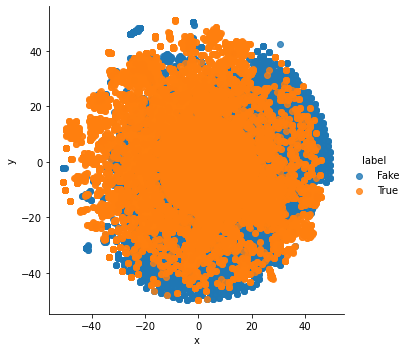

In [91]:
df_tsne = pd.DataFrame({'x' : tsne[:,0] , 'y' : tsne[:,1] , 'label' : y_train})
sns.lmplot(data = df_tsne , x = 'x' , y = 'y' , hue = 'label' , fit_reg = False)
plt.show()

Using the tfidf vectorized text of the news record , we can not see any clear distinction between the two types of labels. We observe that the points of both the labels are mostly overlapping

We'll try t-SNE with a higher value of perplexity , say 50 to see if we can get any insights there

In [92]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2 , perplexity = 50 , verbose = 1).fit_transform(X_train_text)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 35910 samples in 0.017s...
[t-SNE] Computed neighbors for 35910 samples in 78.877s...
[t-SNE] Computed conditional probabilities for sample 1000 / 35910
[t-SNE] Computed conditional probabilities for sample 2000 / 35910
[t-SNE] Computed conditional probabilities for sample 3000 / 35910
[t-SNE] Computed conditional probabilities for sample 4000 / 35910
[t-SNE] Computed conditional probabilities for sample 5000 / 35910
[t-SNE] Computed conditional probabilities for sample 6000 / 35910
[t-SNE] Computed conditional probabilities for sample 7000 / 35910
[t-SNE] Computed conditional probabilities for sample 8000 / 35910
[t-SNE] Computed conditional probabilities for sample 9000 / 35910
[t-SNE] Computed conditional probabilities for sample 10000 / 35910
[t-SNE] Computed conditional probabilities for sample 11000 / 35910
[t-SNE] Computed conditional probabilities for sample 12000 / 35910
[t-SNE] Computed conditional probabilities for s

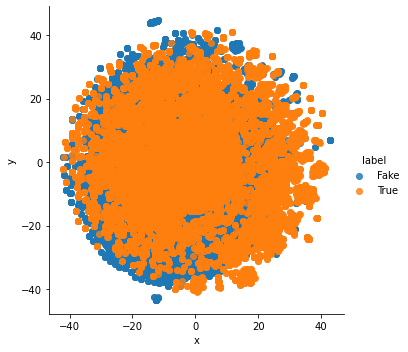

In [93]:
df_tsne = pd.DataFrame({'x' : tsne[:,0] , 'y' : tsne[:,1] , 'label' : y_train})
sns.lmplot(data = df_tsne , x = 'x' , y = 'y' , hue = 'label' , fit_reg = False)
plt.show()

Even for the value of perplexity = 50 , we observe that there are mostly overlapping points across the two labels and hence not much can be inferred from the tsne plot of the tfidf vectors of the text data

# Plotting t-SNE for tfidf vectors of the news title

In [94]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2 , perplexity = 30 , verbose = 1).fit_transform(X_train_title)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 35910 samples in 0.002s...
[t-SNE] Computed neighbors for 35910 samples in 26.515s...
[t-SNE] Computed conditional probabilities for sample 1000 / 35910
[t-SNE] Computed conditional probabilities for sample 2000 / 35910
[t-SNE] Computed conditional probabilities for sample 3000 / 35910
[t-SNE] Computed conditional probabilities for sample 4000 / 35910
[t-SNE] Computed conditional probabilities for sample 5000 / 35910
[t-SNE] Computed conditional probabilities for sample 6000 / 35910
[t-SNE] Computed conditional probabilities for sample 7000 / 35910
[t-SNE] Computed conditional probabilities for sample 8000 / 35910
[t-SNE] Computed conditional probabilities for sample 9000 / 35910
[t-SNE] Computed conditional probabilities for sample 10000 / 35910
[t-SNE] Computed conditional probabilities for sample 11000 / 35910
[t-SNE] Computed conditional probabilities for sample 12000 / 35910
[t-SNE] Computed conditional probabilities for sa

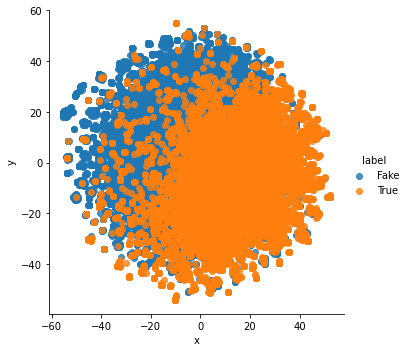

In [95]:
df_tsne = pd.DataFrame({'x' : tsne[:,0] , 'y' : tsne[:,1] , 'label' : y_train})
sns.lmplot(data = df_tsne , x = 'x' , y = 'y' , hue = 'label' , fit_reg = False)
plt.show()

As we did for the text data above , we tried using t-SNE for the news title as well

As it can be seen , this is much better than the t-SNE used on the tfidf vectors of the news text data.

There is some distinction between the points for the two labels but a lot of points are overlapping as well. Here we are using the value of perplexity = 30

In [96]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2 , perplexity = 50 , verbose = 1).fit_transform(X_train_title)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 35910 samples in 0.001s...
[t-SNE] Computed neighbors for 35910 samples in 26.595s...
[t-SNE] Computed conditional probabilities for sample 1000 / 35910
[t-SNE] Computed conditional probabilities for sample 2000 / 35910
[t-SNE] Computed conditional probabilities for sample 3000 / 35910
[t-SNE] Computed conditional probabilities for sample 4000 / 35910
[t-SNE] Computed conditional probabilities for sample 5000 / 35910
[t-SNE] Computed conditional probabilities for sample 6000 / 35910
[t-SNE] Computed conditional probabilities for sample 7000 / 35910
[t-SNE] Computed conditional probabilities for sample 8000 / 35910
[t-SNE] Computed conditional probabilities for sample 9000 / 35910
[t-SNE] Computed conditional probabilities for sample 10000 / 35910
[t-SNE] Computed conditional probabilities for sample 11000 / 35910
[t-SNE] Computed conditional probabilities for sample 12000 / 35910
[t-SNE] Computed conditional probabilities for s

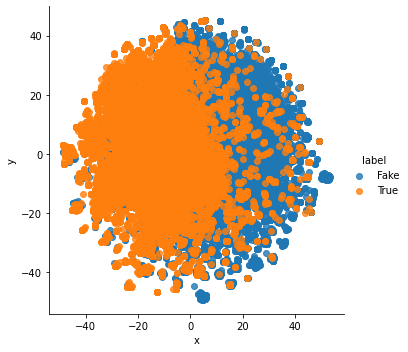

In [97]:
df_tsne = pd.DataFrame({'x' : tsne[:,0] , 'y' : tsne[:,1] , 'label' : y_train})
sns.lmplot(data = df_tsne , x = 'x' , y = 'y' , hue = 'label' , fit_reg = False)
plt.show()

We changed the perplexity value here to 50. Here also we see that there is some distinction between the two types of labels but also that there are some overlapping points

# t-SNE on tfidf vectorized title_and_text (combined together)

In [98]:
vectorizer_title_and_text = TfidfVectorizer(min_df = 10 , ngram_range = (1,3) , max_features = 5000)
vectorizer_title_and_text.fit(X_train['title_and_text'].values)
X_train_title_and_text = vectorizer_title_and_text.transform(X_train['title_and_text'].values)
X_test_title_and_text = vectorizer_title_and_text.transform(X_test['title_and_text'].values)

In [99]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2 , perplexity = 50 , verbose = 1).fit_transform(X_train_title_and_text)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 35910 samples in 0.020s...
[t-SNE] Computed neighbors for 35910 samples in 81.449s...
[t-SNE] Computed conditional probabilities for sample 1000 / 35910
[t-SNE] Computed conditional probabilities for sample 2000 / 35910
[t-SNE] Computed conditional probabilities for sample 3000 / 35910
[t-SNE] Computed conditional probabilities for sample 4000 / 35910
[t-SNE] Computed conditional probabilities for sample 5000 / 35910
[t-SNE] Computed conditional probabilities for sample 6000 / 35910
[t-SNE] Computed conditional probabilities for sample 7000 / 35910
[t-SNE] Computed conditional probabilities for sample 8000 / 35910
[t-SNE] Computed conditional probabilities for sample 9000 / 35910
[t-SNE] Computed conditional probabilities for sample 10000 / 35910
[t-SNE] Computed conditional probabilities for sample 11000 / 35910
[t-SNE] Computed conditional probabilities for sample 12000 / 35910
[t-SNE] Computed conditional probabilities for s

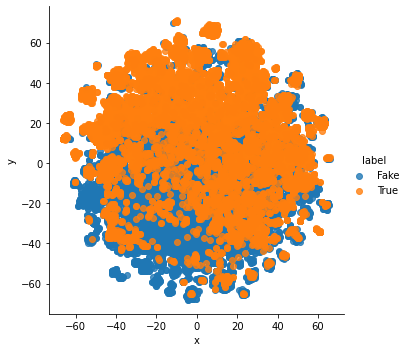

In [100]:
df_tsne = pd.DataFrame({'x': tsne[:,0] , 'y' : tsne[:,1] , 'label' : y_train})
sns.lmplot(data = df_tsne , x = 'x' , y = 'y' , hue = 'label' , fit_reg = False)
plt.show()

Here , we do not observe any clear distinction of the two classes of the point in the plot. A lot of points are overlapping for the two classes of the news

# Encoding Numerical Features

In [101]:
#encode title_len , text_len , title_n_words , text_n_words
from sklearn.preprocessing import Normalizer

Encoding title_len

In [102]:
normalizer = Normalizer()
normalizer.fit(X_train['title_len'].values.reshape(-1,1))
X_train_title_len_norm = normalizer.transform(X_train['title_len'].values.reshape(-1,1))
X_test_title_len_norm = normalizer.transform(X_test['title_len'].values.reshape(-1,1))

Encoding text_len

In [103]:
normalizer = Normalizer()
normalizer.fit(X_train['text_len'].values.reshape(-1,1))
X_train_text_len_norm = normalizer.transform(X_train['text_len'].values.reshape(-1,1))
X_test_text_len_norm = normalizer.transform(X_test['text_len'].values.reshape(-1,1))

Encoding title_n_words

In [104]:
normalizer = Normalizer()
normalizer.fit(X_train['title_n_words'].values.reshape(-1,1))
X_train_title_words_norm = normalizer.transform(X_train['title_n_words'].values.reshape(-1,1))
X_test_title_words_norm = normalizer.transform(X_test['title_n_words'].values.reshape(-1,1))

Encoding text_n_words

In [105]:
normalizer = Normalizer()
normalizer.fit(X_train['text_n_words'].values.reshape(-1,1))
X_train_text_words_norm = normalizer.transform(X_train['text_n_words'].values.reshape(-1,1))
X_test_text_words_norm = normalizer.transform(X_test['text_n_words'].values.reshape(-1,1))

In [106]:
from scipy.sparse import hstack

In [107]:
X_train_set = hstack((X_train_month , X_train_title , X_train_text , X_train_title_len_norm , X_train_text_len_norm , X_train_title_words_norm , X_train_text_words_norm)).tocsr()
X_test_set = hstack((X_test_month , X_test_title , X_test_text , X_test_title_len_norm , X_test_text_len_norm , X_test_title_words_norm , X_test_text_words_norm)).tocsr()

In [108]:
from sklearn.metrics import confusion_matrix

In [109]:
def plot_confusion_matrix (test_y , predict_y):
    C = confusion_matrix(test_y , predict_y)
    A = (((C.T)/(C.sum(axis = 1))).T)
    B = (C/C.sum(axis = 0))
    
    plt.figure(figsize= (20,4))
    
    labels = [1,2]
    
    #representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

In [110]:
print(X_train_set.shape)
print(X_test_set.shape)

(35910, 10016)
(8978, 10016)


# Modelling Part (First Cut Solution)

In [111]:
from sklearn.naive_bayes import MultinomialNB

In [112]:
model = MultinomialNB(alpha = 0.001)
model.fit(X_train_set , y_train)

MultinomialNB(alpha=0.001)

In [113]:
y_predict = model.predict(X_test_set)

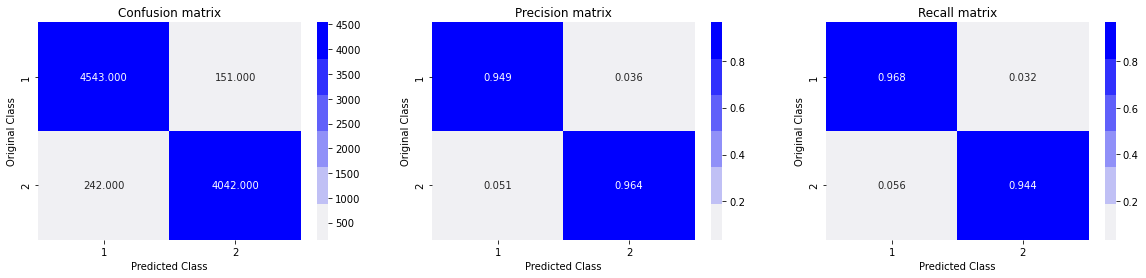

In [114]:
plot_confusion_matrix(y_test , y_predict)

In [115]:
from sklearn import metrics
score = metrics.accuracy_score(y_test , y_predict)
print(np.round(score*100,2),'%')

95.62 %


In [116]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [117]:
model.fit(X_train_set , y_train)

LogisticRegression()

In [118]:
y_predict = model.predict(X_test_set)

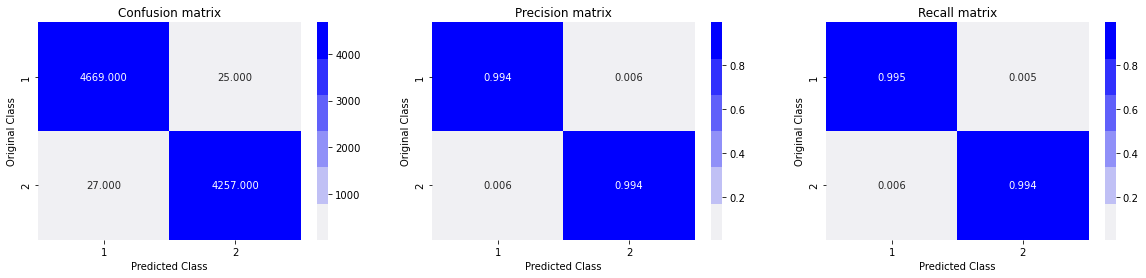

In [119]:
plot_confusion_matrix(y_test , y_predict)

In [120]:
score = metrics.accuracy_score(y_test , y_predict)

In [121]:
print(np.round(score*100 , 2),'%')

99.42 %


# Final Modelling and Hyperparameter Tuning

Using TFIDF weighted Word2Vec for the feature "Title_and_Text"

In [122]:
import pickle
with open (r'glove_vectors' , 'rb') as f:
    glove_model = pickle.load(f)
    glove_words = set(glove_model.keys())

In [124]:
tfidf_model_title_and_text = TfidfVectorizer(max_features = 5000)
tfidf_model_title_and_text.fit(X_train['title_and_text'])
dictionary = dict(zip(tfidf_model_title_and_text.get_feature_names() , list(tfidf_model_title_and_text.idf_)))
tfidf_words = set(tfidf_model_title_and_text.get_feature_names())

In [125]:
#tfidf_word2vec for train dataset
from tqdm import tqdm
X_train_tfidf_w2v = []
for sentence in tqdm(X_train['title_and_text']):
    vector = np.zeros(300)
    tf_idf_weight = 0
    for word in sentence.split():
        if (word in glove_words) and (word in tfidf_words):
            vec = glove_model[word]
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split()))
            vector += vec * tf_idf
            tf_idf_weight +=tf_idf
    if tf_idf_weight != 0:
        vector/=tf_idf_weight
    X_train_tfidf_w2v.append(vector)
X_train_tfidf_w2v = np.array(X_train_tfidf_w2v)
            
            

100%|██████████| 35910/35910 [02:54<00:00, 206.23it/s]


In [126]:
#tfidf_word2vec for test dataset
X_test_tfidf_w2v = []
for sentence in tqdm(X_test['title_and_text']):
    vector = np.zeros(300)
    tf_idf_weight = 0
    for word in sentence.split():
        if (word in glove_words) and (word in tfidf_words):
            vec = glove_model[word]
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split()))
            vector+= vec*tf_idf
            tf_idf_weight += tf_idf
    if tf_idf_weight !=0:
        vector/=tf_idf_weight
    X_test_tfidf_w2v.append(vector)
X_test_tfidf_w2v = np.array(X_test_tfidf_w2v)

100%|██████████| 8978/8978 [00:42<00:00, 211.58it/s]


In [127]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_tfidf_w2v)
X_train_tfidf_w2v = scaler.transform(X_train_tfidf_w2v)
X_test_tfidf_w2v = scaler.transform(X_test_tfidf_w2v)

In [128]:
X_train_set = hstack((X_train_month , X_train_title ,X_train_tfidf_w2v , X_train_text , X_train_title_len_norm , X_train_text_len_norm , X_train_title_words_norm , X_train_text_words_norm)).tocsr()
X_test_set = hstack((X_test_month , X_test_title ,X_test_tfidf_w2v , X_test_text , X_test_title_len_norm , X_test_text_len_norm , X_test_title_words_norm , X_test_text_words_norm)).tocsr()

In [129]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#from sklearn.pipeline import Pipeline

# Naive Bayes

In [130]:
model_NB = MultinomialNB()
param = {'alpha' : [0.001 , 0.01 , 0.1 , 1 , 10 , 100 , 1000] }
clf = GridSearchCV(model_NB , param , scoring = 'roc_auc' , cv = 5 , return_train_score = True) #running 5 cross validation grid search
clf.fit(X_train_set , y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc')

In [131]:
train_auc = clf.cv_results_['mean_train_score']
train_auc_std = clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std = clf.cv_results_['std_test_score']

In [132]:
print('Best Score :' , clf.best_score_)
print('alpha with best score' , clf.best_params_)

Best Score : 0.9887308760854054
alpha with best score {'alpha': 0.01}


# Plotting hyperparameter vs AUC

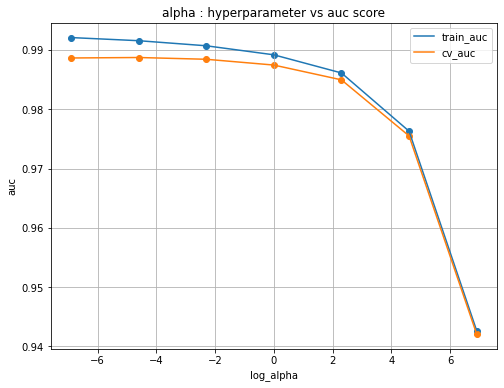

In [133]:
import math
log_param = []
for i in param['alpha']:
    log_param.append(math.log(i))
    
plt.figure(figsize = (8,6))
plt.grid()
plt.plot(log_param , train_auc , label = 'train_auc')
plt.plot(log_param , cv_auc , label = 'cv_auc')
plt.scatter(log_param , train_auc)
plt.scatter(log_param , cv_auc)
plt.title('alpha : hyperparameter vs auc score')
plt.xlabel('log_alpha')
plt.ylabel('auc')
plt.legend()
plt.show()

In [134]:
model_NB = MultinomialNB(alpha = 0.01)
model_NB.fit(X_train_set , y_train)
y_predict = model_NB.predict(X_test_set)

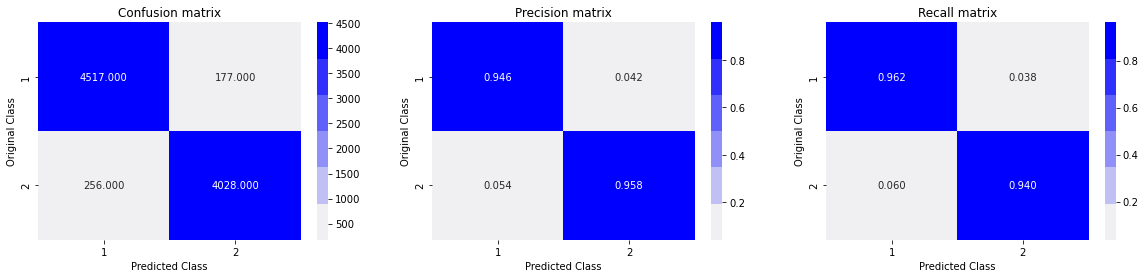

In [135]:
plot_confusion_matrix(y_test , y_predict)

In [136]:
score = metrics.accuracy_score(y_test , y_predict)

In [137]:
print('accuracy score is ', np.round(score*100,2) , '%')

accuracy score is  95.18 %


In [138]:
from sklearn.metrics import f1_score

In [139]:
F1_Score = f1_score(y_test,y_predict, pos_label = 'Fake' )

In [140]:
print('F1_Score is : ' ,np.round(F1_Score,4))

F1_Score is :  0.9543


We see that the tfidf weighted word2vec for title+text feature (in addition to the text and the title feature separately) is not adding to any further improvements in the model. Hence not using this feature

In [141]:
X_train_set = hstack((X_train_month , X_train_title , X_train_text , X_train_title_len_norm , X_train_text_len_norm , X_train_title_words_norm , X_train_text_words_norm)).tocsr()
X_test_set = hstack((X_test_month , X_test_title , X_test_text , X_test_title_len_norm , X_test_text_len_norm , X_test_title_words_norm , X_test_text_words_norm)).tocsr()

# Logistic Regression

In [142]:
lg = LogisticRegression(penalty = 'l2')
param = {'C' : [0.001 , 0.01 , 0.1 , 1 , 10 , 100 , 1000]}
clf = GridSearchCV(lg , param , scoring = 'roc_auc' , cv = 5 , return_train_score = True)
clf.fit(X_train_set , y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc')

In [143]:
train_auc = clf.cv_results_['mean_train_score']
train_auc_std = clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std = clf.cv_results_['std_test_score']

In [144]:
print('Best Score :' , clf.best_score_)
print('alpha with best score' , clf.best_params_)

Best Score : 0.9997996913654053
alpha with best score {'C': 100}


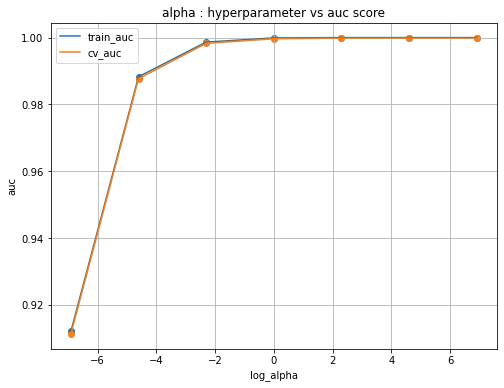

In [145]:
import math
log_param = []
for i in param['C']:
    log_param.append(math.log(i))
    
plt.figure(figsize = (8,6))
plt.grid()
plt.plot(log_param , train_auc , label = 'train_auc')
plt.plot(log_param , cv_auc , label = 'cv_auc')
plt.scatter(log_param , train_auc)
plt.scatter(log_param , cv_auc)
plt.title('alpha : hyperparameter vs auc score')
plt.xlabel('log_alpha')
plt.ylabel('auc')
plt.legend()
plt.show()

In [146]:
lg = LogisticRegression(penalty = 'l2' , C = 100)
lg.fit(X_train_set , y_train)

LogisticRegression(C=100)

In [147]:
y_predict = lg.predict(X_test_set)

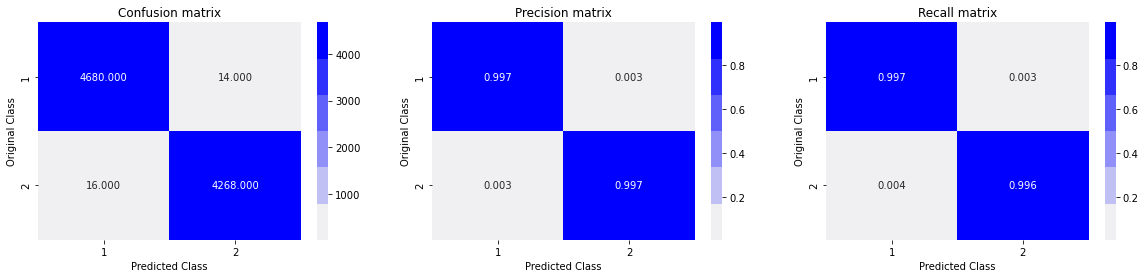

In [148]:
plot_confusion_matrix(y_test , y_predict)

In [149]:
score = metrics.accuracy_score(y_test , y_predict)

In [150]:
print('Percentage Accuracy is :' , np.round(score*100,1) , '%')

Percentage Accuracy is : 99.7 %


In [151]:
F1_Score = f1_score(y_test,y_predict, pos_label = 'Fake' )

In [152]:
print('F1_Score is : ' ,np.round(F1_Score,3))

F1_Score is :  0.997


# Using XGBOOST Model with hyperparameter tuning

In [153]:
from xgboost import XGBClassifier

In [155]:
#using Label Encoder for encoding the values of y_train , y_cv and y_test
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
#y_cv = le.fit_transform(y_cv)
y_test = le.fit_transform(y_test)

In [156]:
x_clf = XGBClassifier()
params = {'learning_rate' : [0.01 , 0.1 , 1 , 10 , 100],
         'n_estimators' : [100 , 200 , 500 , 1000 , 2000 ],
         'colsample_bytree' : [0.1 , 0.3 , 0.5 , 1],
         'subsample' : [0.1 , 0.3 , 0.5 , 1]}
clf = RandomizedSearchCV(x_clf , params , cv = 5 , verbose = 1 , n_jobs = -1)
clf.fit(X_train_set , y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.1, 0.3, 0.5, 1],
                                        'learning_rate': [0.01, 0.1, 1, 10,
                                                          100],
                                        'n_estimators': [100, 200, 500, 1000,
                                                         2000],
                                        'subsample': [0.1, 0.3, 0.5, 1]},
                   verbose=1)

In [157]:
clf.best_params_

{'subsample': 0.5,
 'n_estimators': 100,
 'learning_rate': 0.1,
 'colsample_bytree': 0.3}

In [169]:
x_clf = XGBClassifier(learning_rate = 0.1 , n_estimators = 100 , subsample = 0.5 , colsample_bytree = 0.3)

In [170]:
x_clf.fit(X_train_set , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [171]:
y_predict = x_clf.predict(X_test_set)

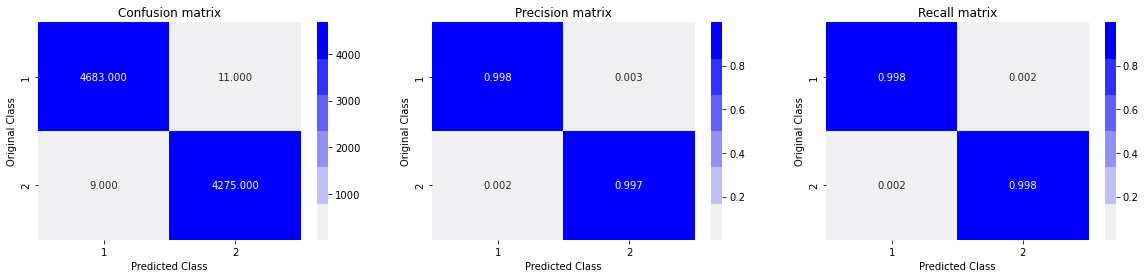

In [172]:
plot_confusion_matrix(y_test , y_predict)

In [173]:
accuracy_score = metrics.accuracy_score(y_test , y_predict)

In [174]:
print('Accuracy is :' , np.round(accuracy_score*100,1) , '%')

Accuracy is : 99.8 %


In [175]:
F1_Score = f1_score(y_test , y_predict)

In [176]:
print('F1_Score is :' , np.round(F1_Score,3))

F1_Score is : 0.998


In [177]:
from prettytable import PrettyTable

In [184]:
myTable = PrettyTable(['Model' , 'Accuracy' , 'F1_Score'])

In [185]:
myTable.add_row(['NB' , '95.2%' , '0.954'])
myTable.add_row(['Logistic Regression' , '99.7%','0.997'])
myTable.add_row(['XGBoost' , '99.8%' , '0.998'])

In [186]:
print(myTable)

+---------------------+----------+----------+
|        Model        | Accuracy | F1_Score |
+---------------------+----------+----------+
|          NB         |  95.2%   |  0.954   |
| Logistic Regression |  99.7%   |  0.997   |
|       XGBoost       |  99.8%   |  0.998   |
+---------------------+----------+----------+


The XGBoost Model is giving us the best results from the above three models